In [1]:
#import the libraries
import pandas as pd
import numpy as np

In [2]:
 #import the dataset (skip the first 3 rows)
df = pd.read_excel("/content/Urban-population-households-density-by-county.xlsx", skiprows=3)
df.head()

,Unnamed: 0,Total,Male,Female,Intersex,Unnamed: 5,Total.1,Conventional,Group quarters,Sq. Km.,Persons per Sq. Km.
0,KENYA,14831700.0,7352134.0,7478883.0,683,NaN,4711664.0,4663734.0,47930,7525.76414,1971.0
1,MOMBASA,1208333.0,610257.0,598046.0,30,NaN,378422.0,376295.0,2127,219.89648,5495.0
2,KWALE,126431.0,62395.0,64031.0,5,NaN,37005.0,36910.0,95,62.78439,2014.0
3,KILIFI,393888.0,191324.0,202558.0,6,NaN,112718.0,112603.0,115,169.44817,2325.0
4,TANA RIVER,75722.0,37854.0,37867.0,1,NaN,19897.0,19314.0,583,189.23626,400.0


DATASET CAN BE ACQUIRED FROM THE KNBS WEBSITE

In [4]:
df.shape

(49, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           49 non-null     object 
 1   Total                48 non-null     float64
 2   Male                 48 non-null     float64
 3   Female               48 non-null     float64
 4   Intersex             48 non-null     object 
 5   Unnamed: 5           0 non-null      float64
 6   Total.1              48 non-null     float64
 7   Conventional         48 non-null     float64
 8   Group quarters       48 non-null     object 
 9   Sq. Km.              48 non-null     float64
 10  Persons per Sq. Km.  48 non-null     float64
dtypes: float64(8), object(3)
memory usage: 4.3+ KB


A large part of the dataset has numerical data

In [6]:
# Check for missing values
df.isnull().sum()

Unnamed: 0              0
Total                   1
Male                    1
Female                  1
Intersex                1
Unnamed: 5             49
Total.1                 1
Conventional            1
Group quarters          1
Sq. Km.                 1
Persons per Sq. Km.     1
dtype: int64

In [7]:
#Drop the null column
df.drop("Unnamed: 5", axis=1, inplace=True)

In [8]:
#notice hyphens are not considered null
df.Intersex.unique()

array([683, 30, 5, 6, 1, 2, 7, 22, 10, 9, '-', 3, 13, 108, 16, 4, 70, 23,
       15, 8, 245, nan], dtype=object)

In [9]:
#make them null
df.replace('-',np.nan, inplace = True)
df.isnull().mean()*100

Unnamed: 0              0.000000
Total                   2.040816
Male                    2.040816
Female                  2.040816
Intersex               12.244898
Total.1                 2.040816
Conventional            2.040816
Group quarters          4.081633
Sq. Km.                 2.040816
Persons per Sq. Km.     2.040816
dtype: float64

In [10]:
#confirm the column is dropped
df.shape

(49, 10)

In [11]:
df.columns

Index(['Unnamed: 0', 'Total', 'Male', 'Female', 'Intersex', 'Total.1',
       'Conventional', 'Group quarters', 'Sq. Km.', 'Persons per Sq. Km.'],
      dtype='object')

In [12]:
#show the null rows
null_rows = df[df.isnull().any(axis=1)]
null_rows

,Unnamed: 0,Total,Male,Female,Intersex,Total.1,Conventional,Group quarters,Sq. Km.,Persons per Sq. Km.
17,MAKUENI,77076.0,39209.0,37867.0,NaN,27059.0,26927.0,132.0,65.47677,1177.0
24,WEST POKOT,31841.0,15544.0,16297.0,NaN,8610.0,8595.0,15.0,17.21143,1850.0
25,SAMBURU,47132.0,23716.0,23416.0,NaN,12790.0,12493.0,297.0,54.26512,869.0
40,BUSIA,113753.0,54963.0,58790.0,NaN,30784.0,30760.0,24.0,45.36109,2508.0
46,NYAMIRA,47036.0,22666.0,24370.0,NaN,13048.0,13048.0,NaN,21.28573,2210.0
48,Source: 2019 Kenya Population and Housing Census,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#drop the null row
index_to_drop = 48
df.drop(index_to_drop, inplace=True)
df.shape

(48, 10)

In [14]:
#percentage of nulls in rows
df.isnull().mean()*100

Unnamed: 0              0.000000
Total                   0.000000
Male                    0.000000
Female                  0.000000
Intersex               10.416667
Total.1                 0.000000
Conventional            0.000000
Group quarters          2.083333
Sq. Km.                 0.000000
Persons per Sq. Km.     0.000000
dtype: float64

In [15]:
#fill missing values in the intersex column using the mean
df['Intersex'].fillna(df['Intersex'].mean(), inplace = True)

In [16]:
df.isnull().mean()*100

Unnamed: 0             0.000000
Total                  0.000000
Male                   0.000000
Female                 0.000000
Intersex               0.000000
Total.1                0.000000
Conventional           0.000000
Group quarters         2.083333
Sq. Km.                0.000000
Persons per Sq. Km.    0.000000
dtype: float64

In [17]:
#check the correlation with other columns
df.corr()['Group quarters']

<ipython-input-17-7f3aa241a90b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Group quarters']


Total                  0.980579
Male                   0.980532
Female                 0.980614
Intersex               0.974961
Total.1                0.979013
Conventional           0.978584
Group quarters         1.000000
Sq. Km.                0.974551
Persons per Sq. Km.    0.149661
Name: Group quarters, dtype: float64

<ipython-input-18-56a85d46d3e2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()['Group quarters']
<ipython-input-18-56a85d46d3e2>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True, cmap = 'coolwarm')


<function matplotlib.pyplot.show(close=None, block=None)>

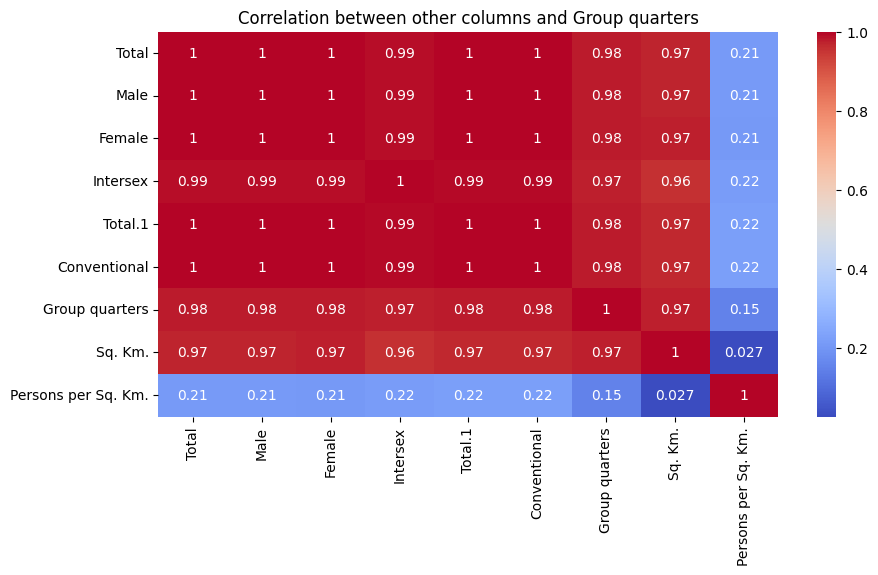

In [18]:
#we can create a visualization
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()['Group quarters']
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot= True, cmap = 'coolwarm')
plt.title("Correlation between other columns and Group quarters")
plt.show


In [19]:
#I prefer this
correlation = df.corr()['Group quarters']
highest_corr = correlation.nlargest(4)
smallest_corr = correlation.nsmallest(3)

print("Highest Correlations:")
print(highest_corr)

print("\nWeakest Correlations:")
print(smallest_corr)

Highest Correlations:
Group quarters    1.000000
Female            0.980614
Total             0.980579
Male              0.980532
Name: Group quarters, dtype: float64

Weakest Correlations:
Persons per Sq. Km.    0.149661
Sq. Km.                0.974551
Intersex               0.974961
Name: Group quarters, dtype: float64


<ipython-input-19-40f0b0c60e79>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['Group quarters']


In [20]:
#predict missing values based on other columns
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

known_quarters = df[df['Group quarters'].notnull()]
unknown_qaurters = df[df['Group quarters'].isnull()]

regressor.fit(known_quarters[['Female', 'Total']], known_quarters['Group quarters'])
predict_quarters = regressor.predict(unknown_qaurters[['Female', 'Total']])
df.loc[df['Group quarters'].isnull(), 'Group quarters'] = predict_quarters

In [21]:
df.isnull().sum()

Unnamed: 0             0
Total                  0
Male                   0
Female                 0
Intersex               0
Total.1                0
Conventional           0
Group quarters         0
Sq. Km.                0
Persons per Sq. Km.    0
dtype: int64

In [22]:
df.describe()

,Total,Male,Female,Intersex,Total.1,Conventional,Group quarters,Sq. Km.,Persons per Sq. Km.
count,4.800000e+01,4.800000e+01,4.800000e+01,48.000000,4.800000e+01,4.800000e+01,48.000000,48.000000,48.000000
mean,6.179875e+05,3.063389e+05,3.116201e+05,31.767442,1.963193e+05,1.943222e+05,2001.053866,313.573506,1868.854167
std,2.203393e+06,1.092643e+06,1.110659e+06,103.459692,7.053887e+05,6.983642e+05,7175.378133,1082.324589,1127.336439
min,2.057900e+04,9.973000e+03,1.060300e+04,1.000000,6.141000e+03,6.096000e+03,1.000000,10.866110,225.000000
25%,7.561375e+04,3.702800e+04,3.786700e+04,3.000000,2.201575e+04,2.194150e+04,90.000000,42.717502,1213.250000
50%,1.260500e+05,6.273500e+04,6.331000e+04,5.500000,3.198200e+04,3.147200e+04,239.500000,82.665215,1701.000000
75%,1.953065e+05,9.849700e+04,9.897900e+04,17.500000,5.188775e+04,5.164175e+04,797.500000,179.196100,2200.250000
max,1.483170e+07,7.352134e+06,7.478883e+06,683.000000,4.711664e+06,4.663734e+06,47930.000000,7525.764140,6247.000000


In [23]:
#male count per county
highest_male_count = df.groupby('Unnamed: 0')['Male'].sum()
highest_male_count = highest_male_count.sort_values(ascending = False)
highest_male_count

Unnamed: 0
KENYA                  7352134.0
    NAIROBI CITY       2192452.0
    KIAMBU              831589.0
    MOMBASA             610257.0
    NAKURU              517633.0
    KAJIADO             306865.0
    UASIN GISHU         254000.0
    KISUMU              216221.0
    MACHAKOS            206460.0
    KILIFI              191324.0
    MANDERA             135548.0
    GARISSA             109552.0
    WAJIR                94812.0
    BUNGOMA              91911.0
    KAKAMEGA             90451.0
    TRANS NZOIA          88501.0
    MIGORI               80300.0
    KISII                73924.0
    NYERI                73395.0
    TURKANA              71597.0
    MERU                 68166.0
    KIRINYAGA            64925.0
    LAIKIPIA             63163.0
    ISIOLO               63075.0
    KWALE                62395.0
    MURANG'A             56878.0
    BUSIA                54963.0
    MARSABIT             54790.0
    HOMA BAY             53569.0
    NAROK                49818.0

*   Nairobi, Kiambu, Mombasa and Nakuru records the highest male populations in the country

In [24]:
#female count per county
highest_female_count = df.groupby('Unnamed: 0')['Female'].sum()
highest_female_count = highest_female_count.sort_values(ascending = False)
highest_female_count

Unnamed: 0
KENYA                  7478883.0
    NAIROBI CITY       2204376.0
    KIAMBU              874588.0
    MOMBASA             598046.0
    NAKURU              529377.0
    KAJIADO             315734.0
    UASIN GISHU         256189.0
    KISUMU              224670.0
    MACHAKOS            207609.0
    KILIFI              202558.0
    MANDERA             134909.0
    GARISSA             101331.0
    BUNGOMA              98195.0
    KAKAMEGA             94880.0
    TRANS NZOIA          90228.0
    MIGORI               86896.0
    WAJIR                82340.0
    KISII                77478.0
    NYERI                77357.0
    KIRINYAGA            71286.0
    MERU                 70747.0
    TURKANA              69193.0
    LAIKIPIA             64193.0
    KWALE                64031.0
    ISIOLO               62589.0
    MURANG'A             61548.0
    HOMA BAY             59506.0
    BUSIA                58790.0
    MARSABIT             52447.0
    NAROK                50529.0

*   Nairobi, Kiambu, Mombasa and Nakuru  also records the highest female populations in the country

In [25]:
#intersex count per county
highest_intersex_count = df.groupby('Unnamed: 0')['Intersex'].sum()
highest_intersex_count = highest_intersex_count.sort_values(ascending = False)
highest_intersex_count

Unnamed: 0
KENYA                  683.000000
    NAIROBI CITY       245.000000
    KIAMBU             108.000000
    NAKURU              70.000000
    SAMBURU             31.767442
    BUSIA               31.767442
    NYAMIRA             31.767442
    MAKUENI             31.767442
    WEST POKOT          31.767442
    MOMBASA             30.000000
    KAJIADO             23.000000
    WAJIR               22.000000
    UASIN GISHU         16.000000
    KISUMU              15.000000
    KIRINYAGA           13.000000
    MANDERA             10.000000
    MACHAKOS             9.000000
    KAKAMEGA             9.000000
    EMBU                 9.000000
    KISII                8.000000
    GARISSA              7.000000
    KILIFI               6.000000
    KERICHO              6.000000
    BUNGOMA              6.000000
    TAITA/TAVETA         5.000000
    NYANDARUA            5.000000
    KWALE                5.000000
    MERU                 5.000000
    NAROK                5.000000
   

*  Nairobi, Kiambu and Nakuru record the highest number of intersex

In [28]:
#average ratio of male:females per county
males_female_county = df.groupby('Unnamed: 0')['Male','Female'].sum()
males_female_county['Ratio of males to females'] = (males_female_county['Male']/males_female_county['Female']).apply(lambda x: f'{int(x)}:{int(1)}')
males_female_county

<ipython-input-28-0d0651ff85bf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  males_female_county = df.groupby('Unnamed: 0')['Male','Female'].sum()


,Male,Female,Ratio of males to females
Unnamed: 0,,,
BARINGO,36866.0,38422.0,0:1
BOMET,14168.0,13802.0,1:1
BUNGOMA,91911.0,98195.0,0:1
BUSIA,54963.0,58790.0,0:1
ELGEYO/MARAKWET,9973.0,10603.0,0:1
EMBU,37082.0,38833.0,0:1
GARISSA,109552.0,101331.0,1:1
HOMA BAY,53569.0,59506.0,0:1
ISIOLO,63075.0,62589.0,1:1


In [40]:
#Counties with more males than females
males_female_county = df.groupby('Unnamed: 0')['Male','Female'].sum()
males_female_county = males_female_county[males_female_county['Male'] > males_female_county['Female']]
print(males_female_county)
count = len(males_female_county)
print(count)

                  Male    Female
Unnamed: 0                      
    BOMET      14168.0   13802.0
    GARISSA   109552.0  101331.0
    ISIOLO     63075.0   62589.0
    KERICHO    48024.0   45508.0
    LAMU       19533.0   18911.0
    MAKUENI    39209.0   37867.0
    MANDERA   135548.0  134909.0
    MARSABIT   54790.0   52447.0
    MOMBASA   610257.0  598046.0
    SAMBURU    23716.0   23416.0
    TURKANA    71597.0   69193.0
    WAJIR      94812.0   82340.0
12


<ipython-input-40-7708925dc4e1>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  males_female_county = df.groupby('Unnamed: 0')['Male','Female'].sum()





*  12 counties have more males to females






In [38]:
#Counties with more females than males
males_female_county = df.groupby('Unnamed: 0')['Male','Female'].sum()
males_female_county = males_female_county[males_female_county['Female'] > males_female_county['Male']]
print(males_female_county)
count = len(males_female_county)
print(count)

                          Male     Female
Unnamed: 0                               
    BARINGO            36866.0    38422.0
    BUNGOMA            91911.0    98195.0
    BUSIA              54963.0    58790.0
    ELGEYO/MARAKWET     9973.0    10603.0
    EMBU               37082.0    38833.0
    HOMA BAY           53569.0    59506.0
    KAJIADO           306865.0   315734.0
    KAKAMEGA           90451.0    94880.0
    KIAMBU            831589.0   874588.0
    KILIFI            191324.0   202558.0
    KIRINYAGA          64925.0    71286.0
    KISII              73924.0    77478.0
    KISUMU            216221.0   224670.0
    KITUI              26060.0    27958.0
    KWALE              62395.0    64031.0
    LAIKIPIA           63163.0    64193.0
    MACHAKOS          206460.0   207609.0
    MERU               68166.0    70747.0
    MIGORI             80300.0    86896.0
    MURANG'A           56878.0    61548.0
    NAIROBI CITY     2192452.0  2204376.0
    NAKURU            517633.0   5

<ipython-input-38-7faae6641bc9>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  males_female_county = df.groupby('Unnamed: 0')['Male','Female'].sum()



*   More counties record more females to males
*   Their number is 35.
*   The last count shows Kenya as a country has more females hence falling
     in this category.





In [42]:
group_quarter_distributions = df.groupby('Unnamed: 0')['Group quarters'].sum()
group_quarter_distributions = group_quarter_distributions.sort_values(ascending = False)
group_quarter_distributions

Unnamed: 0
KENYA                  47930.000000
    NAIROBI CITY       12212.000000
    NAKURU             11075.000000
    KISUMU              3682.000000
    KIAMBU              2748.000000
    NYERI               2264.000000
    MOMBASA             2127.000000
    LAIKIPIA            2054.000000
    ISIOLO              1383.000000
    MANDERA             1056.000000
    KAJIADO              965.000000
    HOMA BAY             910.000000
    GARISSA              760.000000
    SIAYA                730.000000
    WAJIR                660.000000
    TURKANA              627.000000
    TANA RIVER           583.000000
    UASIN GISHU          356.000000
    KISII                346.000000
    SAMBURU              297.000000
    MERU                 281.000000
    MARSABIT             267.000000
    MACHAKOS             255.000000
    BUNGOMA              250.000000
    MIGORI               229.000000
    KIRINYAGA            223.000000
    NYAMIRA              190.585557
    BOMET        

Nairobi, Nakuru, Kisumu and kiambu have the largest numbers of group quarters

In [43]:
land_area_distributions = df.groupby('Unnamed: 0')['Sq. Km.'].sum()
land_area_distributions = land_area_distributions.sort_values(ascending = False)
land_area_distributions

Unnamed: 0
KENYA                  7525.76414
    NAKURU              949.14692
    KIAMBU              762.61933
    NAIROBI CITY        703.87005
    ISIOLO              558.28597
    KAJIADO             388.11580
    WAJIR               375.56540
    UASIN GISHU         305.46403
    MACHAKOS            243.10501
    TURKANA             234.41268
    MOMBASA             219.89648
    TANA RIVER          189.23626
    GARISSA             175.84938
    MANDERA             169.55764
    KILIFI              169.44817
    LAIKIPIA            148.60421
    KISUMU              138.77828
    MARSABIT            136.35246
    KAKAMEGA            117.69586
    TAITA/TAVETA        113.31865
    BUNGOMA             111.88793
    TRANS NZOIA         109.30323
    MIGORI               84.06862
    KIRINYAGA            83.52591
    NYERI                81.80452
    MURANG'A             70.59251
    LAMU                 67.75009
    MAKUENI              65.47677
    KWALE                62.78439
   

Nakuru, Kiambu, Nairobi and Isiolo have the largest land areas

In [44]:
density_distributions = df.groupby('Unnamed: 0')['Persons per Sq. Km.'].sum()
density_distributions = density_distributions.sort_values(ascending = False)
density_distributions

Unnamed: 0
    NAIROBI CITY       6247.0
    MOMBASA            5495.0
    KISII              3811.0
    MERU               3249.0
    KISUMU             3177.0
    HOMA BAY           2754.0
    BOMET              2536.0
    BUSIA              2508.0
    KILIFI             2325.0
    KITUI              2292.0
    KIAMBU             2237.0
    NYAMIRA            2210.0
    KERICHO            2197.0
    VIHIGA             2152.0
    NAROK              2095.0
    KWALE              2014.0
    MIGORI             1989.0
KENYA                  1971.0
    ELGEYO/MARAKWET    1894.0
    WEST POKOT         1850.0
    NYERI              1843.0
    EMBU               1800.0
    SIAYA              1721.0
    MACHAKOS           1703.0
    BUNGOMA            1699.0
    MURANG'A           1678.0
    UASIN GISHU        1670.0
    TRANS NZOIA        1635.0
    KIRINYAGA          1631.0
    KAJIADO            1604.0
    MANDERA            1595.0
    KAKAMEGA           1575.0
    NYANDARUA          1473.0



*   Kenya has an average of 1971 persons per sq. km.
*   Nairobi, Mombasa, Kisii and Meru have the largest

